<a href="https://colab.research.google.com/github/adithi20/-CSE_Projects/blob/main/Lstm_train_adenocarcinoma_left_lower_lobe_T2_N0_M0_Ib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import cv2

# Define the desired dimensions for resizing
height = 100  # Example height
width = 100   # Example width

# Load and preprocess images
image_paths = ["/content/000000 (6).png", "/content/000005 (3).png", "/content/000005 (9).png",
               "/content/000008 (10).png", "/content/000009 (3).png"]
image_data = []
for path in image_paths:
    image = cv2.imread(path)
    if image is None:
        print("Error: Unable to load image from path:", path)
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    # Resize image to desired dimensions
    image = cv2.resize(image, (width, height))
    image_data.append(image)

# Convert list of images to numpy array
image_data = np.array(image_data)

# Organize image sequences (example: create sequences of length 3)
sequence_length = 3
sequences = []
for i in range(len(image_data) - sequence_length + 1):
    sequence = image_data[i:i+sequence_length]
    sequences.append(sequence)
sequences = np.array(sequences)



In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Conv2D, Flatten, Reshape
from tensorflow.keras.models import Sequential

# Define the desired dimensions for resizing
height = 100  # Example height
width = 100   # Example width

# Load and preprocess images
image_paths = ["/content/000000 (6).png", "/content/000005 (3).png", "/content/000005 (9).png",
               "/content/000008 (10).png", "/content/000009 (3).png"]
image_data = []
for path in image_paths:
    image = cv2.imread(path)
    if image is None:
        print("Error: Unable to load image from path:", path)
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    # Resize image to desired dimensions
    image = cv2.resize(image, (width, height))
    image_data.append(image)

# Convert list of images to numpy array
image_data = np.array(image_data)

# Organize image sequences (example: create sequences of length 3)
sequence_length = 3
sequences = []
for i in range(len(image_data) - sequence_length + 1):
    sequence = image_data[i:i+sequence_length]
    sequences.append(sequence)
sequences = np.array(sequences)

# Define LSTM model
model = Sequential([
    TimeDistributed(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), input_shape=(sequence_length, height, width, 3)),
    TimeDistributed(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')),
    TimeDistributed(Flatten()),
    LSTM(units=128, return_sequences=True),
    TimeDistributed(Dense(units=height * width * 3, activation='sigmoid')),  # Output a single image (sequence)
    Reshape((sequence_length, height, width, 3))  # Reshape to sequence of images
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for image prediction

# Train the model
history = model.fit(sequences, sequences, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
1/1 [==============================] - 33s 33s/step - loss: 6730.5601 - val_loss: 6512.9521
Epoch 2/10
1/1 [==============================] - 27s 27s/step - loss: 6729.7388 - val_loss: 6511.5903
Epoch 3/10
1/1 [==============================] - 28s 28s/step - loss: 6728.3589 - val_loss: 6510.2305
Epoch 4/10
1/1 [==============================] - 28s 28s/step - loss: 6726.9648 - val_loss: 6508.8320
Epoch 5/10
1/1 [==============================] - 27s 27s/step - loss: 6725.5166 - val_loss: 6507.3877
Epoch 6/10
1/1 [==============================] - 29s 29s/step - loss: 6724.0361 - val_loss: 6505.9380
Epoch 7/10
1/1 [==============================] - 28s 28s/step - loss: 6722.5386 - val_loss: 6504.4805
Epoch 8/10
1/1 [==============================] - 27s 27s/step - loss: 6721.0332 - val_loss: 6503.0210
Epoch 9/10
1/1 [==============================] - 28s 28s/step - loss: 6719.5273 - val_loss: 6501.5659
Epoch 10/10
1/1 [==============================] - 28s 28s/step - loss: 6

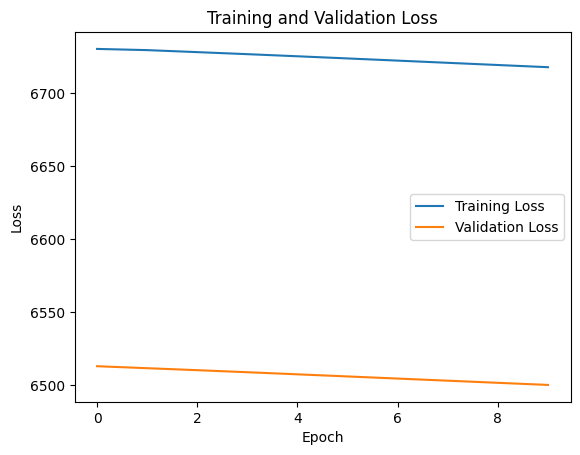

1/1 [==============================] - 4s 4s/step


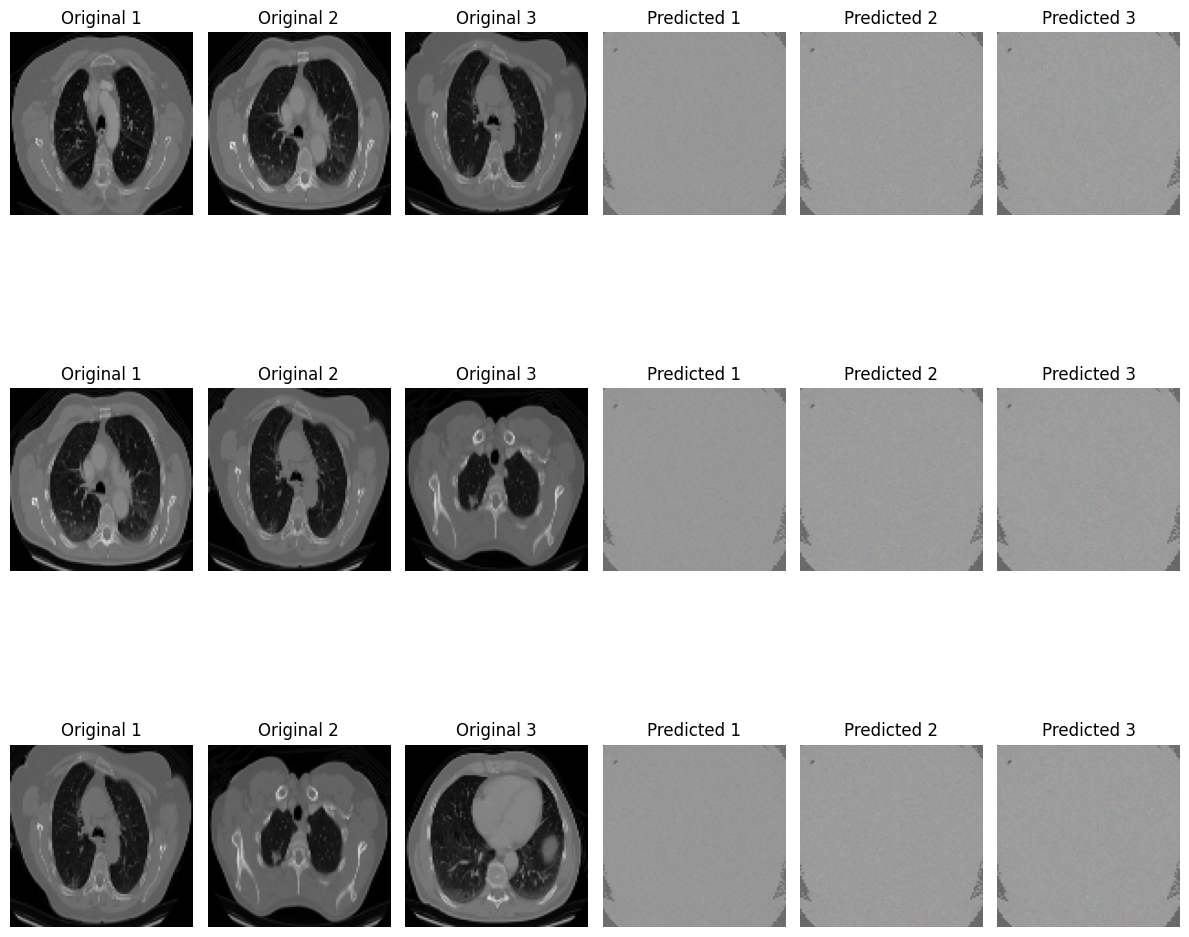

In [2]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Predict some sample sequences and visualize the results
sample_indices = [0, 1, 2]  # Indices of sample sequences to visualize
num_samples = len(sample_indices)

# Predictions
predicted_images = model.predict(sequences)

# Visualize sample sequences
plt.figure(figsize=(12, 4 * num_samples))
for i, idx in enumerate(sample_indices):
    for j in range(sequence_length):
        plt.subplot(num_samples, sequence_length * 2, i * sequence_length * 2 + j + 1)
        plt.imshow(sequences[idx][j])
        plt.title(f'Original {j+1}')
        plt.axis('off')
        plt.subplot(num_samples, sequence_length * 2, i * sequence_length * 2 + j + sequence_length + 1)
        plt.imshow(predicted_images[idx][j])
        plt.title(f'Predicted {j+1}')
        plt.axis('off')
plt.tight_layout()
plt.show()
